<a href="https://colab.research.google.com/github/Akiri12/challenge-alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ACERCA DEL COLAB

El presente Colab es parte del primer proyecto en el proceso de formación en Ciencia de Datos de Alura Latam, para lo cual se utilizará Python y algunas de sus bibliotecas como pandas y matplotlib.

# INFORME

**Objetivos generales:**
A partir de las bases de datos obtenidas de 4 tiendas, sugerir qué tienda debería cerrar para invertir en un nuevo negocio.

**Objetivos específicos:**
**Métricas**
1. Facturación total de cada tienda
2. Categorías más populares
3. Promedio de calificación de los clientes
4. Productos más y menos vendidos
5. Costo promedio de los envíos

**Análisis**
1. Ventas totales y ticket promedio por tienda, donde ticket promedio se calcula como $\frac{\text{ventas totales}}{\text{número de transacciones}}$.
2. Índice de satisfacción promedio por tienda.
3. Costo de envío como porcentaje del precio.
4. Tendencia de ventas por mes.
5. Métodos de pago más usados por tienda.

**Conclusión:**
El Señor debería cerrar tal tienda.


**Gráficos usados:**
1. Usa barras para comparar promedios.
2. Usa boxplots si quieres ver la variabilidad del ticket.
3. Líneas temporales si te interesa ver cómo varía el ticket promedio mes a mes.


# PYTHON


### Importación de datos



In [6]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/Akiri12/challenge-alura-store/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/Akiri12/challenge-alura-store/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/Akiri12/challenge-alura-store/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/Akiri12/challenge-alura-store/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Suma tienda 1: 1150880400.0
Suma tienda 2: 1116343500.0
Suma tienda 3: 1098019600.0
Suma tienda 4: 1038375700.0


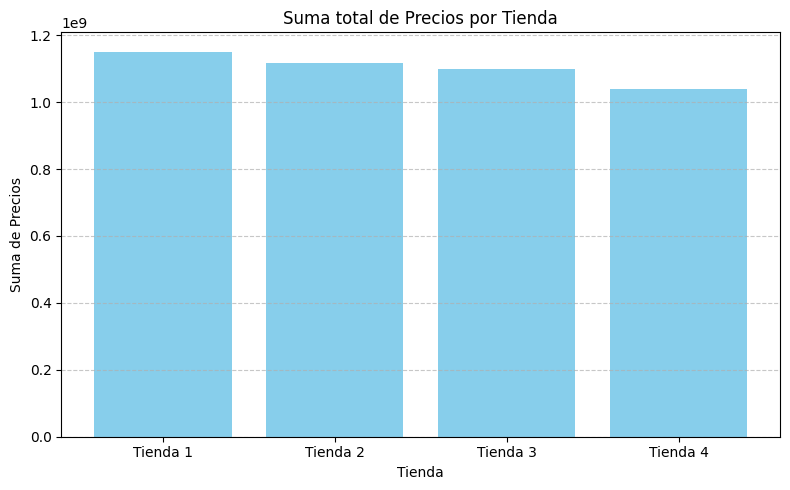

In [9]:
tiendas = [tienda1, tienda2, tienda3, tienda4]
suma_total_por_tienda = []

for i, tienda in enumerate(tiendas, start=1):
    suma = tienda['Precio'].sum()
    suma_total_por_tienda.append(suma)
    print(f"Suma tienda {i}: {suma}")

# Crear lista de sumas
suma_precios = [tienda['Precio'].sum() for tienda in tiendas]

# Nombres de tiendas
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, suma_precios, color='skyblue')
plt.title('Suma total de Precios por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Suma de Precios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [17]:
# Primero hallamos todas las categorías únicas en cada una de las 4 tiendas

categorias_unicas = pd.concat([
    tienda1['Categoría del Producto'],
    tienda2['Categoría del Producto'],
    tienda3['Categoría del Producto'],
    tienda4['Categoría del Producto']
]).unique()

print("Categorías únicas entre todas las tiendas:")
print(categorias_unicas)


Categorías únicas entre todas las tiendas:
['Electrónicos' 'Muebles' 'Juguetes' 'Electrodomésticos'
 'Artículos para el hogar' 'Deportes y diversión' 'Libros'
 'Instrumentos musicales']


Conociendo los nombres de las categorías, procedemos a calcular los precios por categorías para cada tienda.

In [18]:
def suma_por_categoria(tienda, nombre_tienda):
    resultado = tienda.groupby('Categoría del Producto')['Precio'].sum().reset_index()
    resultado.columns = ['Categoría del Producto', f'Suma_{nombre_tienda}']
    return resultado

# Aplicamos la función a cada tienda
cat_t1 = suma_por_categoria(tienda1, 'Tienda1')
cat_t2 = suma_por_categoria(tienda2, 'Tienda2')
cat_t3 = suma_por_categoria(tienda3, 'Tienda3')
cat_t4 = suma_por_categoria(tienda4, 'Tienda4')

# Combinar los datos por "Categoría del Producto"
df_categorias = cat_t1.merge(cat_t2, on='Categoría del Producto', how='outer') \
                      .merge(cat_t3, on='Categoría del Producto', how='outer') \
                      .merge(cat_t4, on='Categoría del Producto', how='outer')

# Rellenar valores faltantes con 0 (por si alguna categoría no aparece en una tienda)
df_categorias.fillna(0, inplace=True)

# Mostrar el DataFrame final
print(df_categorias)



    Categoría del Producto  Suma_Tienda1  Suma_Tienda2  Suma_Tienda3  \
0  Artículos para el hogar    12698400.0    14746900.0    15060000.0   
1     Deportes y diversión    39290000.0    34744500.0    35593100.0   
2        Electrodomésticos   363685200.0   348567800.0   329237900.0   
3             Electrónicos   429493500.0   410831100.0   410775800.0   
4   Instrumentos musicales    91299000.0   104990300.0    77380900.0   
5                 Juguetes    17995700.0    15945400.0    19401100.0   
6                   Libros     8784900.0    10091200.0     9498700.0   
7                  Muebles   187633700.0   176426300.0   201072100.0   

   Suma_Tienda4  
0    15074500.0  
1    33350100.0  
2   283260200.0  
3   409476100.0  
4    75102400.0  
5    20262200.0  
6     9321300.0  
7   192528900.0  


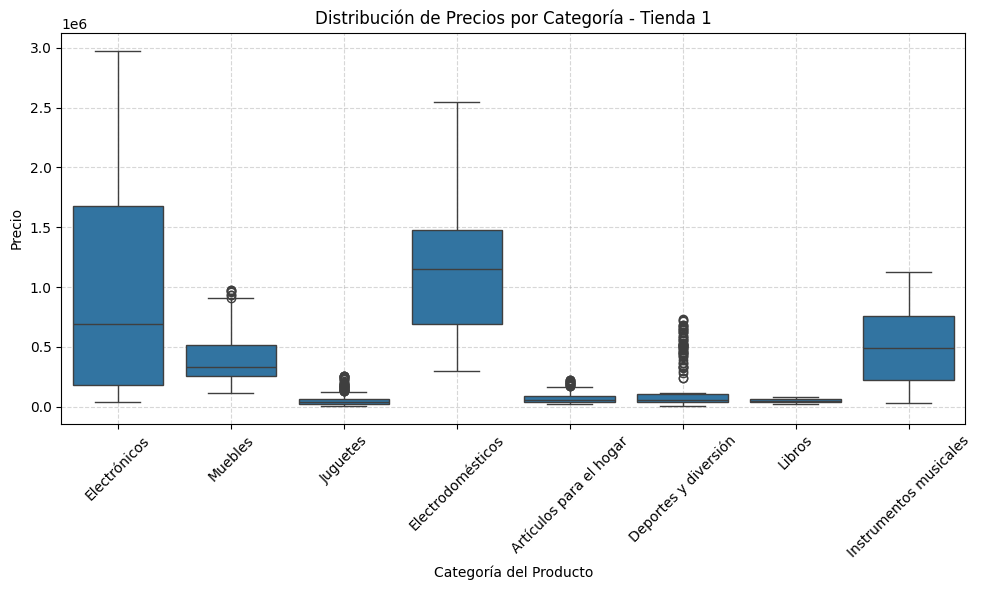

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=tienda1,
    x='Categoría del Producto',
    y='Precio'
)

plt.title('Distribución de Precios por Categoría - Tienda 1')
plt.xticks(rotation=45)
plt.ylabel('Precio')
plt.xlabel('Categoría del Producto')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



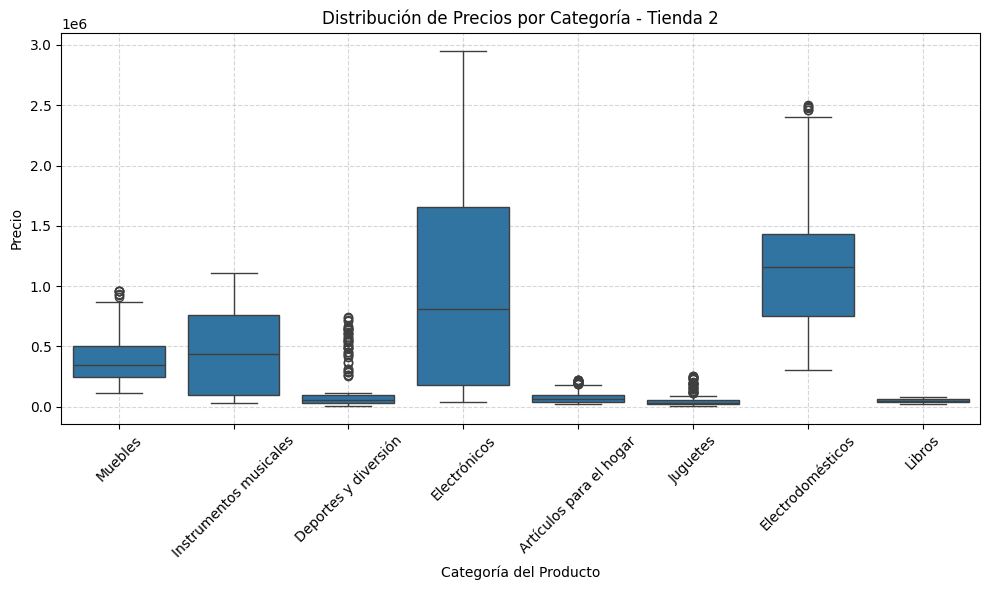

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=tienda2,
    x='Categoría del Producto',
    y='Precio'
)

plt.title('Distribución de Precios por Categoría - Tienda 2')
plt.xticks(rotation=45)
plt.ylabel('Precio')
plt.xlabel('Categoría del Producto')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

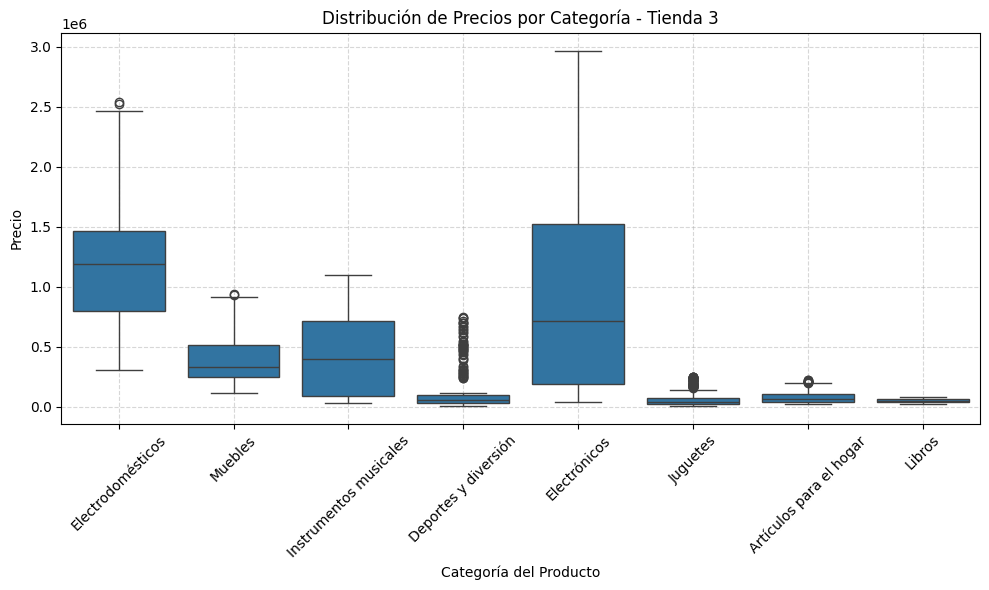

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=tienda3,
    x='Categoría del Producto',
    y='Precio'
)

plt.title('Distribución de Precios por Categoría - Tienda 3')
plt.xticks(rotation=45)
plt.ylabel('Precio')
plt.xlabel('Categoría del Producto')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

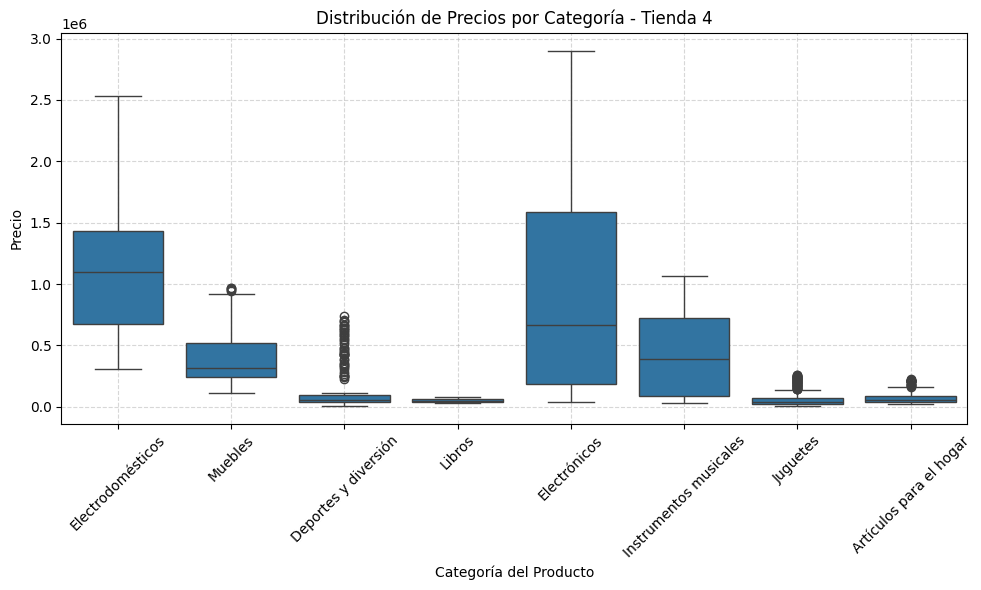

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=tienda4,
    x='Categoría del Producto',
    y='Precio'
)

plt.title('Distribución de Precios por Categoría - Tienda 4')
plt.xticks(rotation=45)
plt.ylabel('Precio')
plt.xlabel('Categoría del Producto')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Visualizamos el resumen de las cuatro tiendas simultáneamente:


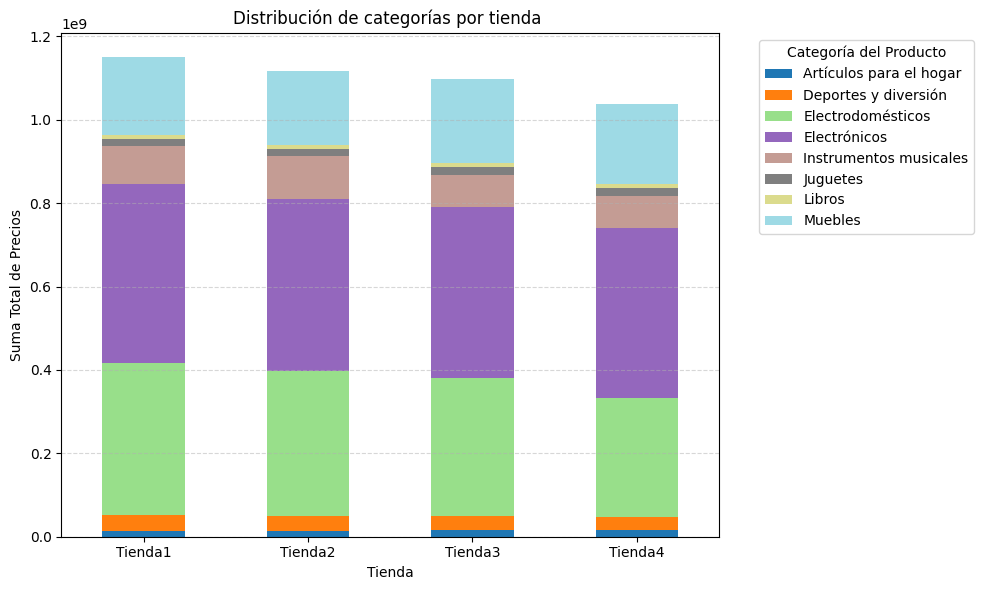

In [28]:
import matplotlib.pyplot as plt

# Reorganizar el DataFrame: index = tienda, columnas = categoría
df_stacked = df_categorias.set_index('Categoría del Producto').T

# Opcional: renombrar índices para que se vean mejor en el gráfico
df_stacked.index = [nombre.replace("Suma_", "") for nombre in df_stacked.index]

# Crear gráfico
df_stacked.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

plt.title('Distribución de categorías por tienda ')
plt.xlabel('Tienda')
plt.ylabel('Suma Total de Precios')
plt.xticks(rotation=0)
plt.legend(title='Categoría del Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# 3. Calificación promedio de la tienda


Calculamos la calificación promedio de cada tienda

Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.00


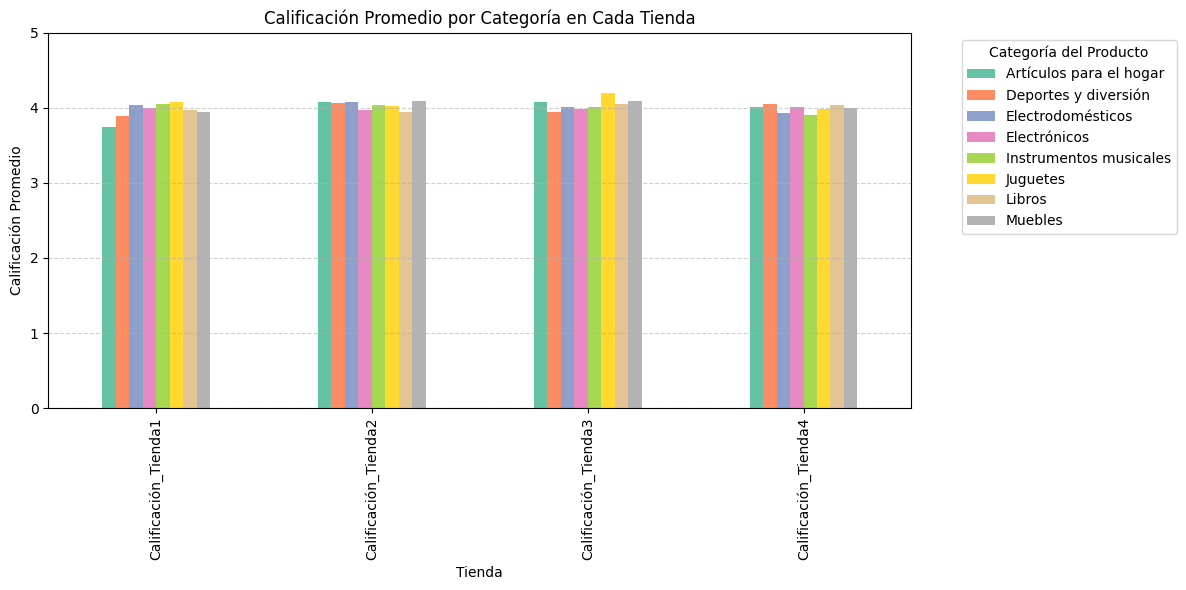

In [32]:
# Suponiendo que la columna se llama "Calificación"
promedio_t1 = tienda1['Calificación'].mean()
promedio_t2 = tienda2['Calificación'].mean()
promedio_t3 = tienda3['Calificación'].mean()
promedio_t4 = tienda4['Calificación'].mean()

# Mostrar resultados
print(f"Calificación promedio Tienda 1: {promedio_t1:.2f}")
print(f"Calificación promedio Tienda 2: {promedio_t2:.2f}")
print(f"Calificación promedio Tienda 3: {promedio_t3:.2f}")
print(f"Calificación promedio Tienda 4: {promedio_t4:.2f}")

def promedio_calificacion_por_categoria(tienda, nombre_tienda):
    df = tienda.groupby('Categoría del Producto')['Calificación'].mean().reset_index()
    df.columns = ['Categoría del Producto', f'Calificación_{nombre_tienda}']
    return df

cat_c1 = promedio_calificacion_por_categoria(tienda1, 'Tienda1')
cat_c2 = promedio_calificacion_por_categoria(tienda2, 'Tienda2')
cat_c3 = promedio_calificacion_por_categoria(tienda3, 'Tienda3')
cat_c4 = promedio_calificacion_por_categoria(tienda4, 'Tienda4')

df_calif = cat_c1.merge(cat_c2, on='Categoría del Producto', how='outer') \
                 .merge(cat_c3, on='Categoría del Producto', how='outer') \
                 .merge(cat_c4, on='Categoría del Producto', how='outer')

df_calif.fillna(0, inplace=True)

import matplotlib.pyplot as plt

df_plot = df_calif.set_index('Categoría del Producto')

df_plot.T.plot(kind='bar', figsize=(12, 6), colormap='Set2')

plt.title('Calificación Promedio por Categoría en Cada Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5)  # Si la calificación va de 0 a 5
plt.legend(title='Categoría del Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

Contamos la cantidad de ventas por producto en cada tienda y creamos un gráfico para ver: los productos más vendidos y los menos vendidos.

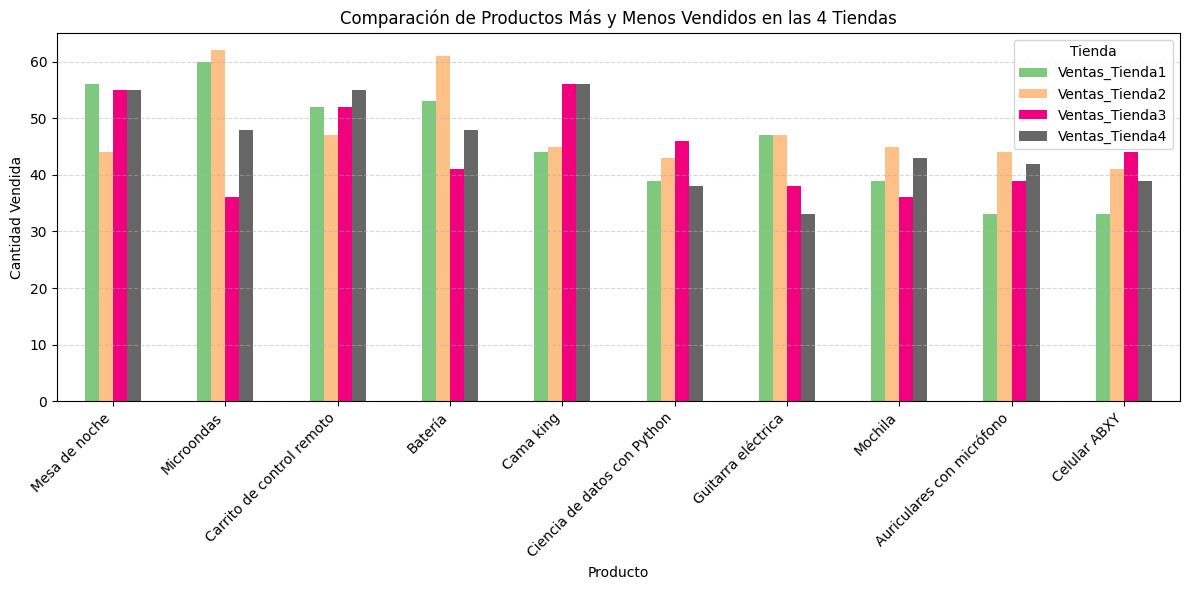

In [33]:
# Contar cantidad de veces que aparece cada producto en cada tienda
ventas1 = tienda1['Producto'].value_counts().reset_index()
ventas1.columns = ['Producto', 'Ventas_Tienda1']

ventas2 = tienda2['Producto'].value_counts().reset_index()
ventas2.columns = ['Producto', 'Ventas_Tienda2']

ventas3 = tienda3['Producto'].value_counts().reset_index()
ventas3.columns = ['Producto', 'Ventas_Tienda3']

ventas4 = tienda4['Producto'].value_counts().reset_index()
ventas4.columns = ['Producto', 'Ventas_Tienda4']

# Unir todos los conteos en un solo DataFrame
df_ventas = ventas1.merge(ventas2, on='Producto', how='outer') \
                   .merge(ventas3, on='Producto', how='outer') \
                   .merge(ventas4, on='Producto', how='outer')

# Reemplazar NaN por 0 (productos no vendidos en alguna tienda)
df_ventas.fillna(0, inplace=True)

# Sumar total de ventas por producto (en todas las tiendas)
df_ventas['Total_Ventas'] = df_ventas[
    ['Ventas_Tienda1', 'Ventas_Tienda2', 'Ventas_Tienda3', 'Ventas_Tienda4']
].sum(axis=1)

# Ordenar por total de ventas
df_ventas_ordenado = df_ventas.sort_values('Total_Ventas', ascending=False)

# Tomar los 5 más y 5 menos vendidos
top5 = df_ventas_ordenado.head(5)
bottom5 = df_ventas_ordenado.tail(5)

# Combinar ambos para graficar
productos_clave = pd.concat([top5, bottom5])


import matplotlib.pyplot as plt

# Reindexar con nombre de producto
df_plot = productos_clave.set_index('Producto')[[
    'Ventas_Tienda1', 'Ventas_Tienda2', 'Ventas_Tienda3', 'Ventas_Tienda4'
]]

# Graficar
df_plot.plot(kind='bar', figsize=(12, 6), colormap='Accent')

plt.title('Comparación de Productos Más y Menos Vendidos en las 4 Tiendas')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda